## Data Analytics - Module 1 Project / Electric Vehicles Adoption in Europe
#### David Hernandez - Data PT June 2025

#### Introduction
#### This project tracks electric vehicle growth in Europe, showing trends in adoption, charging infrastructure, energy consumption, and oil displacement, highlighting how EVs reduce fossil fuel use and support a cleaner transport sector.


#### Data sources
- Dataset: International Energy Agency dataset
https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2025#global-ev-data 

In [ ]:
# Importing modules
import pandas as pd # Data manipulation and analysis
import plotly.express as px # Allows to create interactive plots, charts, graphs, maps, and more
import plotly.graph_objects as go # More control over plots
import matplotlib.pyplot as plt # Create visualizations
import seaborn as sns # Statistical data visualization
import ipywidgets as widgets # Interactive widgets for Jupyter notebooks
from IPython.display import display # Display widgets in Jupyter notebooks


In [2]:
df = pd.read_excel("C:/Users/jdhernandezd/Documents/IRONHACK/Labs/Electric_Vehicles_Project/EV Data Explorer 2025.xlsx")
df

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,1.700000e+08,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,1.500000e+08,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,9.100000e+07,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,8.200000e+07,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,8.200000e+07,_World
...,...,...,...,...,...,...,...,...,...
16431,Rest of the world,Historical,Oil displacement Mbd,Trucks,EV,2017,Million barrels per day,2.400000e-06,Other
16432,Rest of the world,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2011,Million barrels per day,2.200000e-06,Other
16433,Rest of the world,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2010,Million barrels per day,1.700000e-06,Other
16434,USA,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2012,Million barrels per day,1.300000e-06,Other


In [96]:
print(df.head())

  region_country          category parameter              mode powertrain  \
0          World  Projection-STEPS  EV stock  2 and 3 wheelers        BEV   
1          World  Projection-STEPS  EV stock              Cars        BEV   
2          China  Projection-STEPS  EV stock  2 and 3 wheelers        BEV   
3          China  Projection-STEPS  EV stock              Cars        BEV   
4          World  Projection-STEPS  EV stock              Cars       PHEV   

   year      unit        value Aggregate group  
0  2030  Vehicles  170000000.0          _World  
1  2030  Vehicles  150000000.0          _World  
2  2030  Vehicles   91000000.0           Other  
3  2030  Vehicles   82000000.0           Other  
4  2030  Vehicles   82000000.0          _World  


In [97]:
print(df.tail())

          region_country    category             parameter              mode  \
16431  Rest of the world  Historical  Oil displacement Mbd            Trucks   
16432  Rest of the world  Historical  Oil displacement Mbd  2 and 3 wheelers   
16433  Rest of the world  Historical  Oil displacement Mbd  2 and 3 wheelers   
16434                USA  Historical  Oil displacement Mbd  2 and 3 wheelers   
16435  Rest of the world  Historical  Oil displacement Mbd            Trucks   

      powertrain  year                     unit     value Aggregate group  
16431         EV  2017  Million barrels per day  0.000002           Other  
16432         EV  2011  Million barrels per day  0.000002           Other  
16433         EV  2010  Million barrels per day  0.000002           Other  
16434         EV  2012  Million barrels per day  0.000001           Other  
16435         EV  2012  Million barrels per day  0.000001           Other  


In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_country   16436 non-null  object 
 1   category         16436 non-null  object 
 2   parameter        16436 non-null  object 
 3   mode             16436 non-null  object 
 4   powertrain       16436 non-null  object 
 5   year             16436 non-null  int32  
 6   unit             16436 non-null  object 
 7   value            16436 non-null  float64
 8   Aggregate group  16436 non-null  object 
dtypes: float64(1), int32(1), object(7)
memory usage: 1.1+ MB
None


In [99]:
print(df.describe())

               year         value
count  16436.000000  1.643600e+04
mean    2018.852336  2.678267e+05
std        4.271488  3.325613e+06
min     2010.000000  1.200000e-06
25%     2016.000000  1.000000e+00
50%     2019.000000  4.900000e+01
75%     2022.000000  2.500000e+03
max     2030.000000  1.700000e+08


In [3]:
# Checking for missing values
df.isnull()

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16431,False,False,False,False,False,False,False,False,False
16432,False,False,False,False,False,False,False,False,False
16433,False,False,False,False,False,False,False,False,False
16434,False,False,False,False,False,False,False,False,False


In [4]:
# Searching for type of vehicle
(df['unit'].unique())

array(['Vehicles', 'charging points', 'GWh',
       'Oil displacement, million lge', 'percent',
       'Million barrels per day'], dtype=object)

In [5]:
# Checking for regions and countries
(df['region_country'].unique())

array(['World', 'China', 'Asia Pacific', 'India', 'Europe',
       'Rest of the world', 'USA', 'EU27', 'North America', 'Germany',
       'Viet Nam', 'United Kingdom', 'France', 'Norway', 'Canada',
       'Netherlands', 'Central and South America', 'Korea', 'Indonesia',
       'Sweden', 'Belgium', 'Denmark', 'Japan', 'Italy', 'Australia',
       'Turkiye', 'Spain', 'Switzerland', 'Austria', 'Israel', 'Thailand',
       'Finland', 'Portugal', 'Brazil', 'New Zealand',
       'Middle East and Caspian', 'Poland', 'Mexico', 'Malaysia',
       'Russia', 'Iceland', 'Greece', 'Uzbekistan', 'Africa', 'Ireland',
       'Chile', 'Costa Rica', 'Colombia', 'Romania', 'Luxembourg',
       'Czech Republic', 'Hungary', 'Slovenia', 'South Africa',
       'Slovakia', 'Lithuania', 'Bulgaria', 'Croatia', 'Latvia',
       'Estonia', 'Cyprus', 'Jordan', 'Seychelles'], dtype=object)

In [6]:
# "Europe" is going to be used as a filter further in the analysis
df[df['region_country'] == 'Europe']['value'].count()

1106

In [7]:
first_year = df['year'].min()
last_year = df['year'].max()

("First year:", first_year)
("Last year:", last_year)

('Last year:', 2030)

In [8]:
# Year 2030 will be used as a filter further in the analysis
print(sorted(df['year'].unique()))


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2030]


In [9]:
# The year 2030 comes up a total of 346 times in the dataset.
df['year'] = df['year'].astype(int) 

df_hist = df[df['year'] <= 2024]
df_proj = df[df['year'] > 2024]

df_proj


,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,1.700000e+08,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,1.500000e+08,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,9.100000e+07,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,8.200000e+07,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,8.200000e+07,_World
...,...,...,...,...,...,...,...,...,...
15531,Europe,Projection-STEPS,Oil displacement Mbd,2 and 3 wheelers,EV,2030,Million barrels per day,7.000000e-03,Aggregate_sales_stock
15532,USA,Projection-STEPS,Oil displacement Mbd,Buses,EV,2030,Million barrels per day,7.000000e-03,Other
15706,India,Projection-STEPS,Oil displacement Mbd,Trucks,EV,2030,Million barrels per day,3.900000e-03,Other
15707,India,Projection-STEPS,Oil displacement Mbd,Trucks,EV,2030,Million barrels per day,3.900000e-03,Other


In [10]:
# Creating a list of European countries to filter the dataset
Europe = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden', 'Norway', 'Switzerland', 'United Kingdom'
]

# Applying filters to the DataFrame
df_europe = df[
    (df['parameter'].str.lower() == 'ev sales') &
    (df['category'] == 'Historical') &
    (df['powertrain'] == 'BEV') &
    (df['mode'] == 'Cars') &
    (df['region_country'].isin(Europe))
]

# Adding years as columns
pivot_df = df_europe.pivot_table(
    index='region_country',
    columns='year',
    values='value',
    aggfunc='sum',
    fill_value=0
)

# Adding years from 2010 to 2024
all_years = list(range(2010, 2025))
for year in all_years:
    if year not in pivot_df.columns:
        pivot_df[year] = 0

# Ordering columns from 2010 to 2024
pivot_df = pivot_df[all_years]

# Adding Total column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Printing the pivot table
print(pivot_df)


year             2010    2011    2012    2013     2014     2015     2016  \
region_country                                                             
Austria           0.0     0.0     0.0   650.0   1700.0   1700.0   3800.0   
Belgium          48.0   280.0   570.0   500.0   1300.0   1400.0   2100.0   
Bulgaria          0.0     0.0     0.0     0.0      0.0     21.0      5.0   
Croatia           0.0     0.0     0.0     0.0      0.0      0.0      0.0   
Cyprus            0.0     0.0     0.0     0.0      0.0      0.0      0.0   
Czech Republic    0.0     0.0     0.0     0.0      0.0    300.0    200.0   
Denmark           0.0   420.0   490.0   500.0   1600.0   4300.0   1300.0   
Estonia           0.0     0.0     0.0     0.0      0.0     34.0     35.0   
Finland           0.0    30.0    51.0    50.0    180.0    240.0    220.0   
France          190.0  2600.0  5700.0  8900.0  11000.0  18000.0  23000.0   
Germany         140.0  1400.0  2200.0  5200.0   9100.0  12000.0  11000.0   
Greece      

C:\Users\jdhernandezd\AppData\Local\Temp\ipykernel_6140\2943398723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


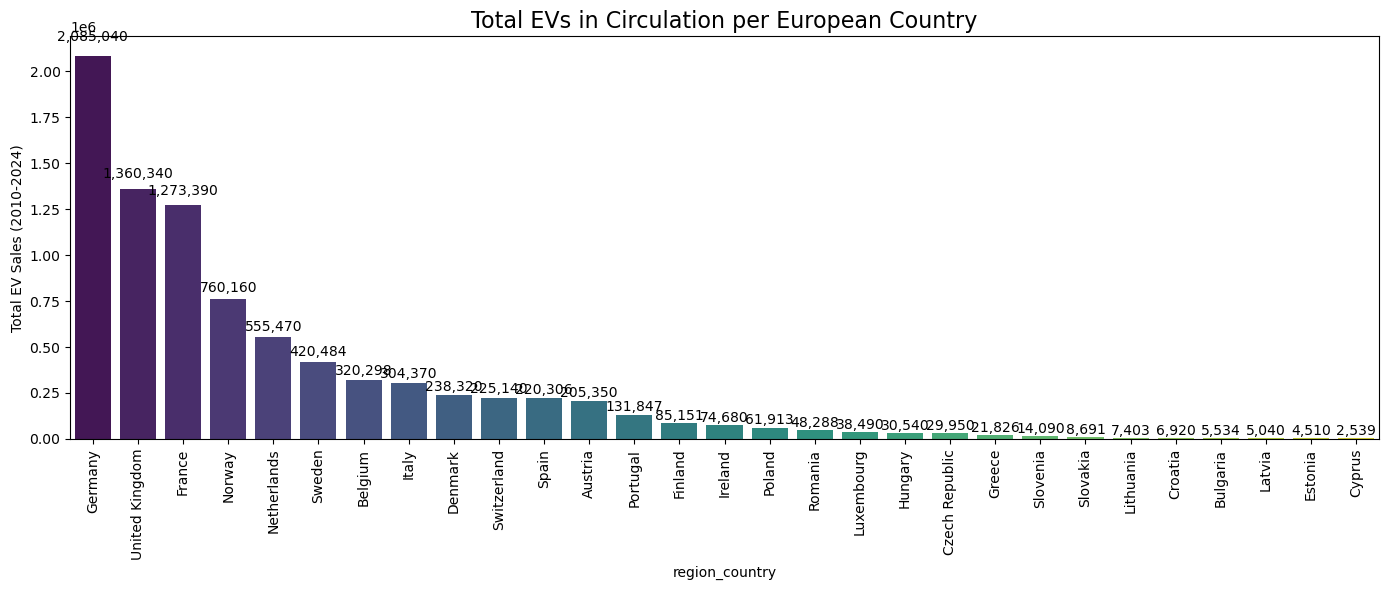

In [11]:
import matplotlib.pyplot as plt # Create visualizations
import seaborn as sns # Statistical data visualization

plt.figure(figsize=(14, 6))
pivot_df_sorted = pivot_df.sort_values('Total', ascending=False)

sns.barplot(
    x=pivot_df_sorted.index,
    y=pivot_df_sorted['Total'],
    palette="viridis"
)

# Dynamic label positions
for i, v in enumerate(pivot_df_sorted['Total']):
    # Offset: 3% of the value above the bar
    offset = v * 0.03 if v > 0 else 50
    plt.text(i, v + offset, f"{int(v):,}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.ylabel("Total EV Sales (2010-2024)")
plt.title("Total EVs in Circulation per European Country", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\jdhernandezd\AppData\Local\Temp\ipykernel_6140\3301856439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


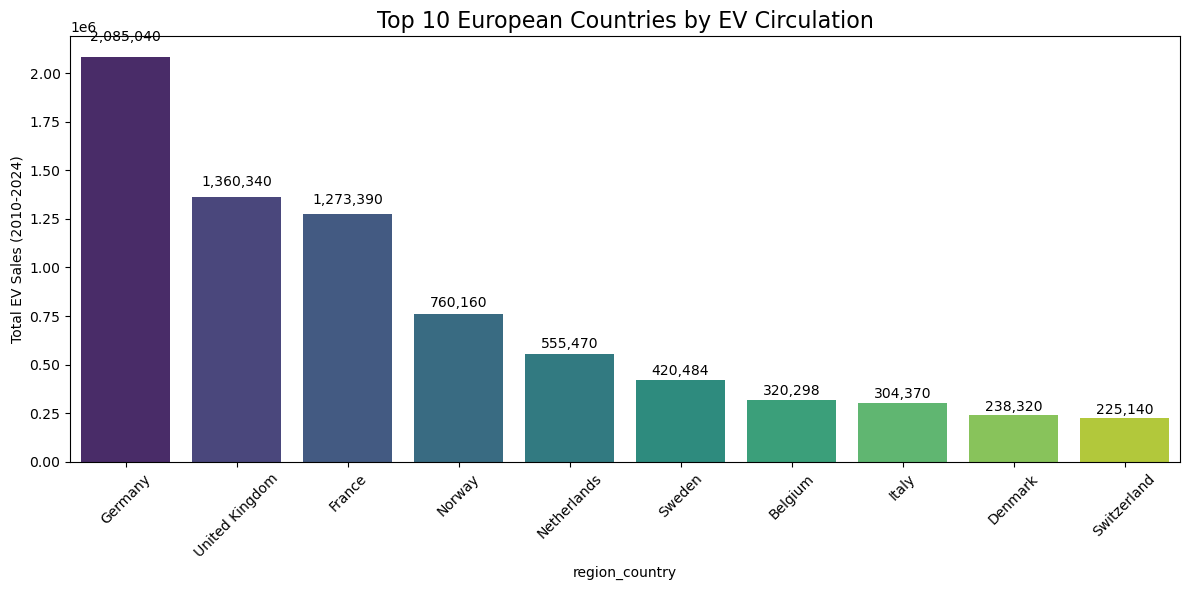

In [12]:
# Focusing on Top 10

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Sort countries by total EV sales (descending) and select Top 10
pivot_df_sorted = pivot_df.sort_values('Total', ascending=False).head(10)

# Create bar plot
sns.barplot(
    x=pivot_df_sorted.index,
    y=pivot_df_sorted['Total'],
    palette="viridis"
)

# Dynamic label positions
for i, v in enumerate(pivot_df_sorted['Total']):
    offset = v * 0.03 if v > 0 else 50
    plt.text(i, v + offset, f"{int(v):,}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel("Total EV Sales (2010-2024)")
plt.title("Top 10 European Countries by EV Circulation", fontsize=16)
plt.tight_layout()
plt.show()


In [13]:
# Creating a DataFrame for Germany after several other errors in the previous code
df_germany = df_europe[
    (df_europe['parameter'] == 'EV sales') &   # lowercase 's'
    (df_europe['category'] == 'Historical') &
    (df_europe['powertrain'] == 'BEV') &
    (df_europe['mode'] == 'Cars') &
    (df_europe['region_country'] == 'Germany')
]

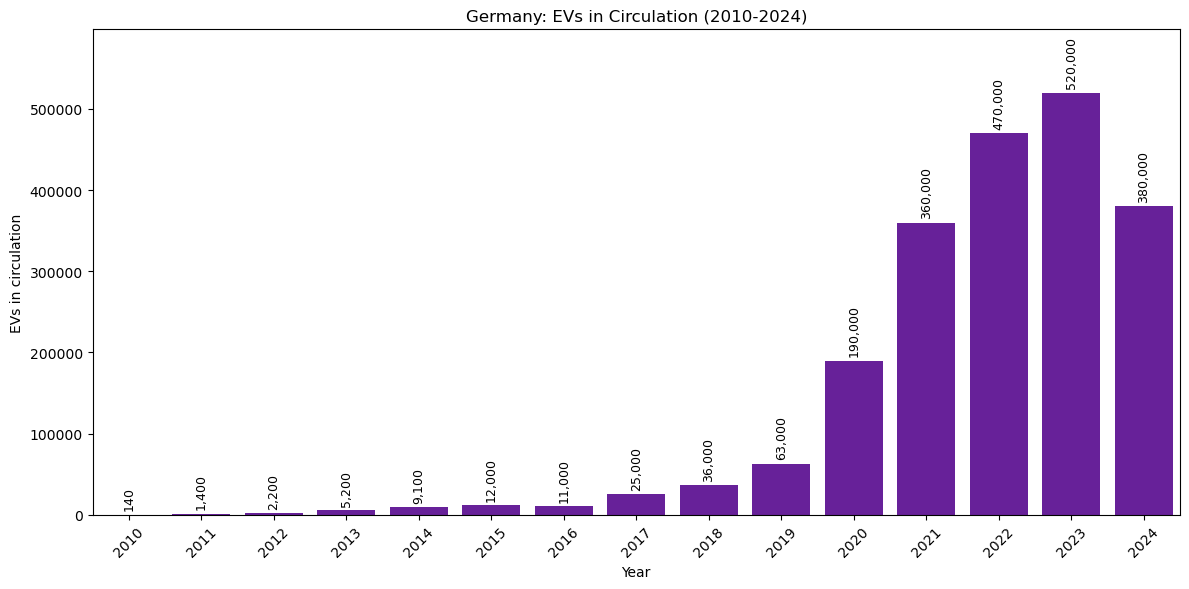

In [25]:
# Bar chart with data labels (purple bars, better spacing)
plt.figure(figsize=(12, 6))
years = list(range(2010, 2025))
values = pivot_germany.loc['Germany', years]

# Barplot with purple color
sns.barplot(x=years, y=values, color='#6a0dad')  # purple hex

# Add data labels on top of bars
for x, y in zip(range(len(years)), values):
    plt.text(x, y + max(values)*0.01, f"{int(y):,}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

# Labels and title
plt.ylabel("EVs in circulation")
plt.xlabel("Year")
plt.title("Germany: EVs in Circulation (2010-2024)")

# Rotate x labels for readability
plt.xticks(rotation=45)

# Add margin above bars so title doesn't overlap
plt.ylim(0, max(values) * 1.15)

plt.tight_layout()
plt.show()


In [27]:
# Quick check of Germany total EVs in circulation 
total_germany = pivot_germany.loc['Germany', years].sum()
print(f"Total EVs in circulation in Germany (2010-2024): {int(total_germany):,}")

Total EVs in circulation in Germany (2010-2024): 2,085,040


In [72]:
# Quick check of Netherlands total EVs in circulation
total_netherlands = pivot_df.loc['Netherlands', years].sum()
print(f"Total EVs in circulation in Netherlands (2010-2024): {int(total_netherlands):,}")


Total EVs in circulation in Netherlands (2010-2024): 555,470


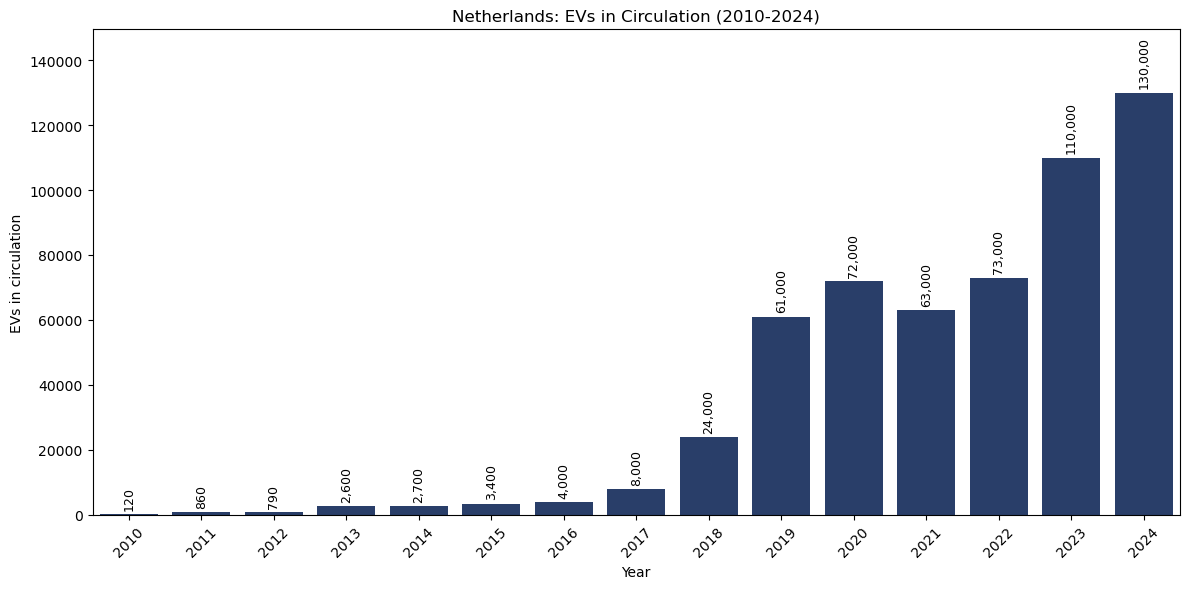

In [34]:
# Choosing Netherlands and years
country = 'Netherlands'  # Change to 'Germany' if needed
years = list(range(2010, 2025))
values = pivot_df.loc[country, years]

# Bar chart with dark blue bars
plt.figure(figsize=(12, 6))
sns.barplot(x=years, y=values, color='#1f3b73')  # dark blue hex

# Add data labels on top of bars
for x, y in zip(range(len(years)), values):
    plt.text(x, y + max(values)*0.01, f"{int(y):,}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

# Labels and title
plt.ylabel("EVs in circulation")
plt.xlabel("Year")
plt.title(f"{country}: EVs in Circulation (2010-2024)")

# Rotate x labels for readability
plt.xticks(rotation=45)

# Add margin above bars so title doesn't overlap
plt.ylim(0, max(values) * 1.15)

plt.tight_layout()
plt.show()


In [ ]:
# Total charging points in Germany
total_cp_germany = df_germany_charging['value'].sum()
print(f"Total EV Charging Points in Germany (2010-2024): {int(total_cp_germany):,}")

Total EV Charging Points in Germany (2010-2024): 535,755


In [68]:
# Total charging points in Netherlands 
total_cp_netherlands = df_netherlands_charging['value'].sum()
print(f"Total EV Charging Points in Netherlands (2010-2024): {int(total_cp_netherlands):,}")


Total EV Charging Points in Netherlands (2010-2024): 796,312


In [54]:
# Filter for Germany charging points
df_germany_charging = df[
    (df['unit'] == 'charging points') &
    (df['region_country'] == 'Germany')
].copy()

# Add a text column for data labels
df_germany_charging['text_label'] = df_germany_charging['value'].apply(lambda x: f"{int(x):,}")

# Plot Germany charging points trend with markers and labels
fig = px.line(
    df_germany_charging,
    x='year',
    y='value',
    markers=True,
    text='text_label',  # show numbers on the chart
    title='Germany: EV Charging Points (2010-2024)',
    labels={'value': 'Charging Points', 'year': 'Year'}
)

# Adjust label position slightly above the markers
fig.update_traces(textposition='top center')

fig.show()


In [ ]:
# List of European countries
Europe = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'
]

# Filter for charging points in all European countries
df_europe_charging = df[
    (df['unit'] == 'charging points') &
    (df['region_country'].isin(Europe))
].copy()

# Add a text label column for data labels
df_europe_charging['text_label'] = df_europe_charging['value'].apply(lambda x: f"{int(x):,}")

# Plot charging points trend with markers and data labels
fig = px.line(
    df_europe_charging,
    x='year',
    y='value',
    color='region_country',
    markers=True,
    text='text_label',  # display the data labels
    title='EV Charging Points Growth in Europe (2010-2024)',
    labels={'value': 'Charging Points', 'year': 'Year', 'region_country': 'Country'}
)

# Adjust label position slightly above markers
fig.update_traces(textposition='top center')

fig.show()


In [55]:
# Filter for Netherlands charging points
df_netherlands_charging = df[
    (df['unit'] == 'charging points') &
    (df['region_country'] == 'Netherlands')
].copy()

# Add a text column for data labels
df_netherlands_charging['text_label'] = df_netherlands_charging['value'].apply(lambda x: f"{int(x):,}")

# Plot Netherlands charging points trend with markers and labels
fig = px.line(
    df_netherlands_charging,
    x='year',
    y='value',
    markers=True,
    text='text_label',  # show numbers on the chart
    title='Netherlands: EV Charging Points (2010-2024)',
    labels={'value': 'Charging Points', 'year': 'Year'}
)

# Adjust label position slightly above the markers
fig.update_traces(textposition='top center')

fig.show()


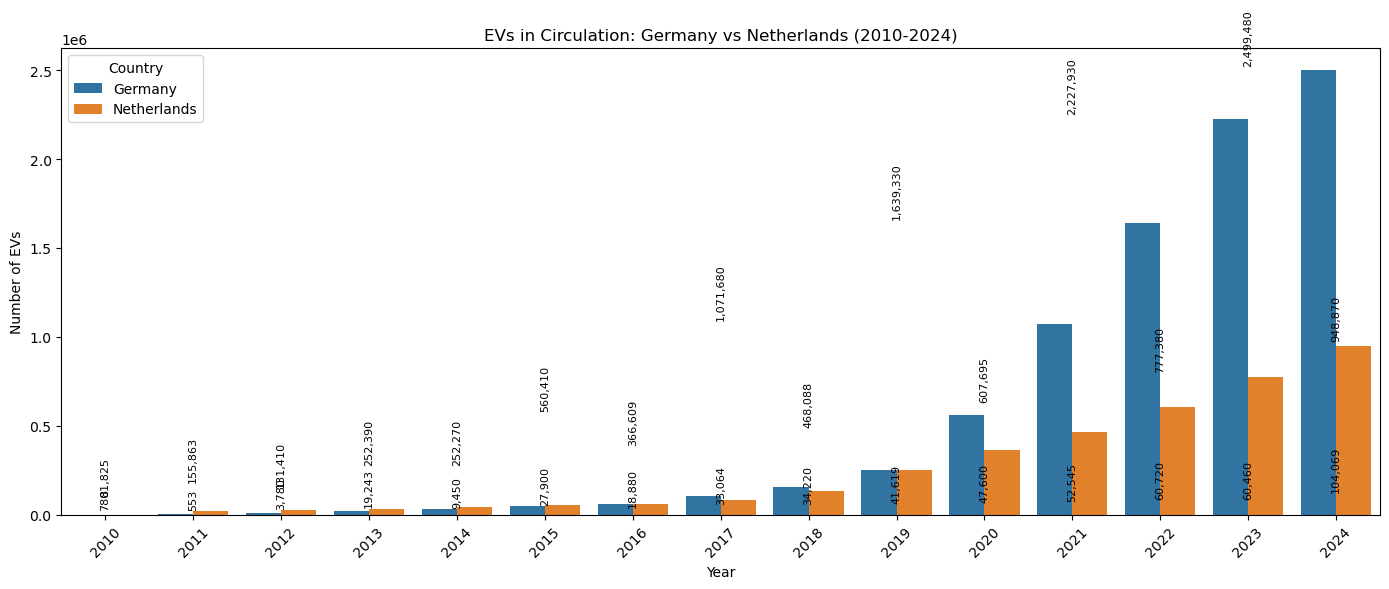

In [ ]:
# Filter for BEV cars, historical data, Germany & Netherlands
df_bev = df[
    (df['powertrain'] == 'BEV') &
    (df['category'] == 'Historical') &
    (df['region_country'].isin(['Germany', 'Netherlands']))
]

# Pivot to have countries as rows, years as columns
pivot_compare = df_bev.pivot_table(
    index='region_country',
    columns='year',
    values='value',
    aggfunc='sum',
    fill_value=0
)

# Prepare data for bar plot in long format
df_plot = pivot_compare.reset_index().melt(id_vars='region_country', var_name='Year', value_name='EVs')

# Bar plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_plot,
    x='Year',
    y='EVs',
    hue='region_country',
    palette=['#1f77b4', '#ff7f0e']  # Germany: dark blue, Netherlands: orange
)

# Add data labels
for i, row in df_plot.iterrows():
    plt.text(
        x=i % len(pivot_compare.columns),  # position within group
        y=row['EVs'] + max(df_plot['EVs'])*0.01,
        s=f"{int(row['EVs']):,}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

plt.title("EVs in Circulation: Germany vs Netherlands (2010-2024)")
plt.ylabel("Number of EVs")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [65]:
# Comparing Germany as the country with the most EV's, and Netherlands as the country with more CP's
countries = ['Germany', 'Netherlands']

# Filter dataset for Germany & Netherlands charging points
df_compare = df[
    (df['unit'] == 'charging points') &
    (df['region_country'].isin(countries))
].copy()

# Add text labels for markers
df_compare['text_label'] = df_compare['value'].apply(lambda x: f"{int(x):,}")

# Plot charging points trend for Germany vs Netherlands
fig = px.line(
    df_compare,
    x='year',
    y='value',
    color='region_country',
    markers=True,
    text='text_label',
    title='EV Charging Points: Germany vs Netherlands (2010-2024)',
    labels={'value': 'Charging Points', 'year': 'Year', 'region_country': 'Country'}
)

# Adjust label position above markers
fig.update_traces(textposition='top center')

fig.show()


In [80]:
# The following cells allow us to check the GWh consumption data per region
# Check all unique units and strip whitespace
print(df['unit'].unique())
print(df['unit'].str.strip().unique())  # just in case there are spaces


['Vehicles' 'charging points' 'GWh' 'Oil displacement, million lge'
 'percent' 'Million barrels per day']
['Vehicles' 'charging points' 'GWh' 'Oil displacement, million lge'
 'percent' 'Million barrels per day']


In [81]:
# Check which countries/regions have non-zero GWh
df_gwh_all = df[df['unit'] == 'GWh']
print(df_gwh_all['region_country'].unique())

['World' 'China' 'Europe' 'USA' 'Rest of the world' 'India']


In [91]:
df_europe_gwh_filtered = df_europe_gwh[df_europe_gwh['year'] <= 2024]
total_gwh = df_europe_gwh_filtered['value'].sum()
print(f"Total GWh consumed by EVs in Europe (2010-2024): {total_gwh:,.0f}")


Total GWh consumed by EVs in Europe (2010-2024): 35,400


In [ ]:
# Checking how much oil is displaced by EVs in Europe
# Filter Europe oil displacement up to 2024
df_europe_oil = df[
    (df['unit'] == 'Oil displacement, million lge') &
    (df['region_country'] == 'Europe') &
    (df['year'] <= 2024)
].copy()

# Group by year
yearly_oil = df_europe_oil.groupby('year')['value'].sum().reset_index()

# Total oil displacement
total_oil = yearly_oil['value'].sum()

print("Yearly oil displacement by EVs in Europe (million lge):")
print(yearly_oil.to_string(index=False))
print(f"\nTotal oil displacement (2010-2024): {total_oil:,.0f} million lge")


Yearly oil displacement by EVs in Europe (million lge):
 year    value
 2010    24.61
 2011    43.14
 2012    85.50
 2013   145.00
 2014   251.30
 2015   402.40
 2016   625.60
 2017   891.20
 2018  1229.60
 2019  1821.00
 2020  4982.00
 2021  9148.00
 2022 13700.00
 2023 21306.00
 2024 24564.00

Total oil displacement (2010-2024): 79,219 million lge


In [101]:
# Getting GWh data for Europe up to 2030
df_europe_gwh_2030 = df[(df['unit'] == 'GWh') & (df['region_country'] == 'Europe') & (df['year'] <= 2030)]

# Group by year
yearly_gwh = df_europe_gwh_2030.groupby('year')['value'].sum().reset_index()

# Calculate cumulative total
yearly_gwh['cumulative'] = yearly_gwh['value'].cumsum()

# Display table
print("Yearly EV electricity consumption in Europe (GWh) up to 2030:")
print(yearly_gwh)

# Optional: total GWh
total_gwh_2030 = yearly_gwh['value'].sum()
print(f"\nTotal GWh consumed by EVs in Europe (2010-2030): {total_gwh_2030:,.0f}")


Yearly EV electricity consumption in Europe (GWh) up to 2030:
    year        value   cumulative
0   2010       0.1293       0.1293
1   2011       0.4483       0.5776
2   2012       0.9419       1.5195
3   2013       1.6233       3.1428
4   2014       2.7758       5.9186
5   2015       4.1231      10.0417
6   2016       5.1962      15.2379
7   2017       8.1193      23.3572
8   2018      12.2290      35.5862
9   2019      24.9460      60.5322
10  2020     107.2400     167.7722
11  2021     183.6800     351.4522
12  2022     255.8200     607.2722
13  2023     347.4200     954.6922
14  2024   34445.6000   35400.2922
15  2030  168624.4000  204024.6922

Total GWh consumed by EVs in Europe (2010-2030): 204,025


In [110]:
# Historical cumulative GWh up to 2024
gwh_cumulative_2024 = df[(df['unit'] == 'GWh') &
                         (df['region_country'] == 'Europe') &
                         (df['year'] <= 2024)]['value'].sum()

# Projected GWh for 2030 (single year projection)
gwh_2030 = df[(df['unit'] == 'GWh') &
              (df['region_country'] == 'Europe') &
              (df['category'] == 'Projection-STEPS') &
              (df['year'] == 2030)]['value'].sum()

# Build comparison DataFrame
df_compare = pd.DataFrame({
    'Type': ['Cumulative (2010-2024)', 'Projected (2030)'],
    'GWh': [gwh_cumulative_2024, gwh_2030]
})

# Plot
import plotly.express as px

fig = px.bar(
    df_compare,
    x='Type',
    y='GWh',
    text=df_compare['GWh'].apply(lambda x: f"{int(x):,} GWh"),
    color='Type',
    color_discrete_map={'Cumulative (2010-2024)': '#1f77b4', 'Projected (2030)': '#ff7f0e'},
    title='EV Electricity Consumption: 2010-2024 vs Projected 2030'
)

fig.update_traces(textposition='outside')
fig.show()


In [117]:
# Historical (2010–2024)
hist_gwh = df_europe_gwh[df_europe_gwh['year'] <= 2024]['value'].sum()

# Projected (2025–2030)
proj_gwh = df_europe_gwh[(df_europe_gwh['year'] >= 2025) & (df_europe_gwh['year'] <= 2030)]['value'].sum()

# Total
total_gwh = hist_gwh + proj_gwh

print(f"Historical EV electricity demand (2010–2024): {hist_gwh:,.0f} GWh")
print(f"Projected EV electricity demand (2025–2030): {proj_gwh:,.0f} GWh")
print(f"Total EV electricity demand (2010–2030): {total_gwh:,.0f} GWh")


Historical EV electricity demand (2010–2024): 35,400 GWh
Projected EV electricity demand (2025–2030): 0 GWh
Total EV electricity demand (2010–2030): 35,400 GWh


In [112]:
# Historical + projected oil displacement (2010–2030)
df_europe_oil_all = df[
    (df['unit'] == 'Oil displacement, million lge') &
    (df['region_country'] == 'Europe') &
    (df['year'] <= 2030)
].copy()

# Separate historical vs projected
df_oil_hist = df_europe_oil_all[df_europe_oil_all['category'] != 'Projection-STEPS']
df_oil_proj = df_europe_oil_all[df_europe_oil_all['category'] == 'Projection-STEPS']

# Group yearly values
yearly_oil_hist = df_oil_hist.groupby('year')['value'].sum().reset_index()
yearly_oil_proj = df_oil_proj.groupby('year')['value'].sum().reset_index()

# Totals
total_oil_hist = yearly_oil_hist['value'].sum()
total_oil_proj = yearly_oil_proj['value'].sum()
total_combined = total_oil_hist + total_oil_proj

# Print results
print("Yearly historical oil displacement by EVs in Europe (million lge):")
print(yearly_oil_hist.to_string(index=False))

print("\nYearly projected oil displacement by EVs in Europe (million lge):")
print(yearly_oil_proj.to_string(index=False))

print(f"\nTotal historical displacement (2010–2024): {total_oil_hist:,.0f} million lge")
print(f"Total projected displacement (2025–2030): {total_oil_proj:,.0f} million lge")
print(f"Total displacement (2010–2030): {total_combined:,.0f} million lge")


Yearly historical oil displacement by EVs in Europe (million lge):
 year    value
 2010    24.61
 2011    43.14
 2012    85.50
 2013   145.00
 2014   251.30
 2015   402.40
 2016   625.60
 2017   891.20
 2018  1229.60
 2019  1821.00
 2020  2491.00
 2021  4574.00
 2022  6850.00
 2023 10653.00
 2024 12282.00

Yearly projected oil displacement by EVs in Europe (million lge):
 year   value
 2020  2491.0
 2021  4574.0
 2022  6850.0
 2023 10653.0
 2024 12282.0
 2030 50010.0

Total historical displacement (2010–2024): 42,369 million lge
Total projected displacement (2025–2030): 86,860 million lge
Total displacement (2010–2030): 129,229 million lge


In [114]:
# Historical data (2010–2024)
df_europe_oil_hist = df[
    (df['unit'] == 'Oil displacement, million lge') &
    (df['region_country'] == 'Europe') &
    (df['year'] <= 2024)
].copy()
df_europe_oil_hist['Type'] = 'Historical'

# Projected data (2025–2030)
df_europe_oil_proj = df[
    (df['unit'] == 'Oil displacement, million lge') &
    (df['region_country'] == 'Europe') &
    (df['category'] == 'Projection-STEPS') &
    (df['year'] > 2024) & (df['year'] <= 2030)
].copy()
df_europe_oil_proj['Type'] = 'Projected'

# Combine both
df_oil_combined = pd.concat([df_europe_oil_hist, df_europe_oil_proj])

# Group by year + type (summing values)
df_oil_combined = df_oil_combined.groupby(['year', 'Type'])['value'].sum().reset_index()

# Plot stacked area chart
fig = px.area(
    df_oil_combined,
    x='year',
    y='value',
    color='Type',
    title='Oil Displacement by EVs in Europe (2010–2030)',
    labels={'value': 'Oil displacement (million lge)', 'year': 'Year'},
    color_discrete_map={'Historical': '#1f77b4', 'Projected': '#ff7f0e'}
)

fig.update_traces(mode='lines+markers')
fig.show()
